In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx', sheet_name = 'Lab 1 - Web Intelligence Public')
data = data[data['Year'].between(2000 ,2006 ,inclusive = True)]
data = data['Authors with affiliations']
data = data.dropna()
data.head(5)

644    Kacprzyk, J., IEEE, IFSA, Systems Research Ins...
645    Zuccala, A., Statistical Cybermetrics Research...
647    Nikravesh, M., BISC Program, Computer Sciences...
648    Lin, T.Y., Department of Computer Science, San...
649    Lin, T.Y., Department of Computer Science, San...
Name: Authors with affiliations, dtype: object

In [3]:
import pycountry

def get_country(sublist):
    country_list = []
    for country in list(pycountry.countries):
        if country.name in sublist:
            for i in range(sublist.count(country.name)):
                country_list.append(country.name)
    return country_list

In [4]:
country_list = []
for sublist in data:
    country_list.append(get_country(sublist))
country_list = [x for x in country_list if x]
filtered_country_list = []
for sublist in country_list:
    if not len(sublist) == sublist.count(sublist[0]):
        filtered_country_list.append(sublist)

In [5]:
for s in filtered_country_list:
    print(s)

['China', 'Japan']
['Australia', 'Australia', 'Burkina Faso', 'China', 'Hong Kong', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan']
['Germany', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States']
['China', 'Japan']
['China', 'Japan']
['United Kingdom', 'United Kingdom', 'United Kingdom', 'Ireland', 'Ireland', 'Ireland']
['Canada', 'Canada', 'China', 'China', 'China', 'China', 'China', 'China', 'Japan']
['Canada', 'Canada', 'China', 'China', 'China', 'China', 'China', 'China', 'Japan']
['China', 'China', 'China', 'China', 'Hong Kong', 'Japan', 'Japan', 'Mongolia']
['Georgia', 'United States', 'United States']
['Austria', 'Austria', 'Austria', 'Austria', 'Germany']
['Canada', 'Canada', 'Japan']
['Finland', 'Russian Federation', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', '

In [6]:
final_list = []
for clist in filtered_country_list:
    final_list += pd.MultiIndex.from_product([clist, clist]).tolist()

In [7]:
import collections
final_list = [x for x in final_list if not len(x) == x.count(x[0])]
final_list = pd.Series(final_list).apply(lambda x: (x[1], x[0]) if x[1] < x[0] else x).tolist()
counted = collections.Counter(final_list)

In [8]:
connections_df = pd.DataFrame(columns=('Country 1', 'Country 2', 'Weight'))
i = 0
for affiliation, count in sorted(counted.items()):
    connections_df.loc[i] = [affiliation[0], affiliation[1], int(count/2)]
    i += 1
    #print(affiliation, count)
print(connections_df)

             Country 1           Country 2 Weight
0            Australia        Burkina Faso      2
1            Australia               China      2
2            Australia           Hong Kong      2
3            Australia               Japan     25
4              Austria             Germany     16
5              Austria       Liechtenstein     12
6         Burkina Faso               China      1
7         Burkina Faso           Hong Kong      1
8         Burkina Faso               Japan     12
9               Canada               China     24
10              Canada           Hong Kong      5
11              Canada               Japan      9
12              Canada            Thailand      4
13              Canada       United States      5
14               China           Hong Kong     10
15               China               Japan     68
16               China            Mongolia      7
17             Finland  Russian Federation      1
18             Finland       United States      8


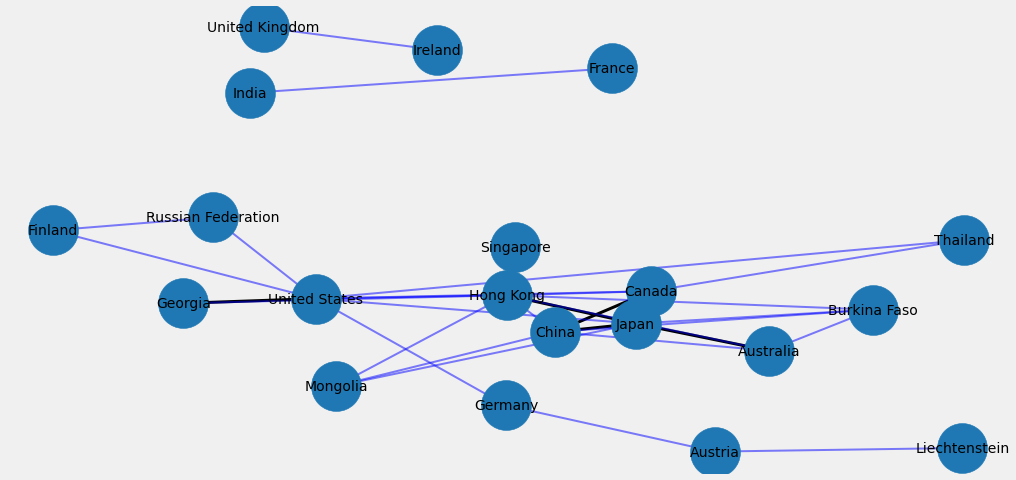

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (16,8)

G = nx.Graph()

for index, row in connections_df.iterrows():
    G.add_edge(row['Country 1'], row['Country 2'], weight = row['Weight'])

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 20]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 20]

pos = nx.spring_layout(G,k=0.65,iterations=30)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2500)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=0.5, edge_color='b', style='solid')

# labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')
plt.axis('off')
plt.show()

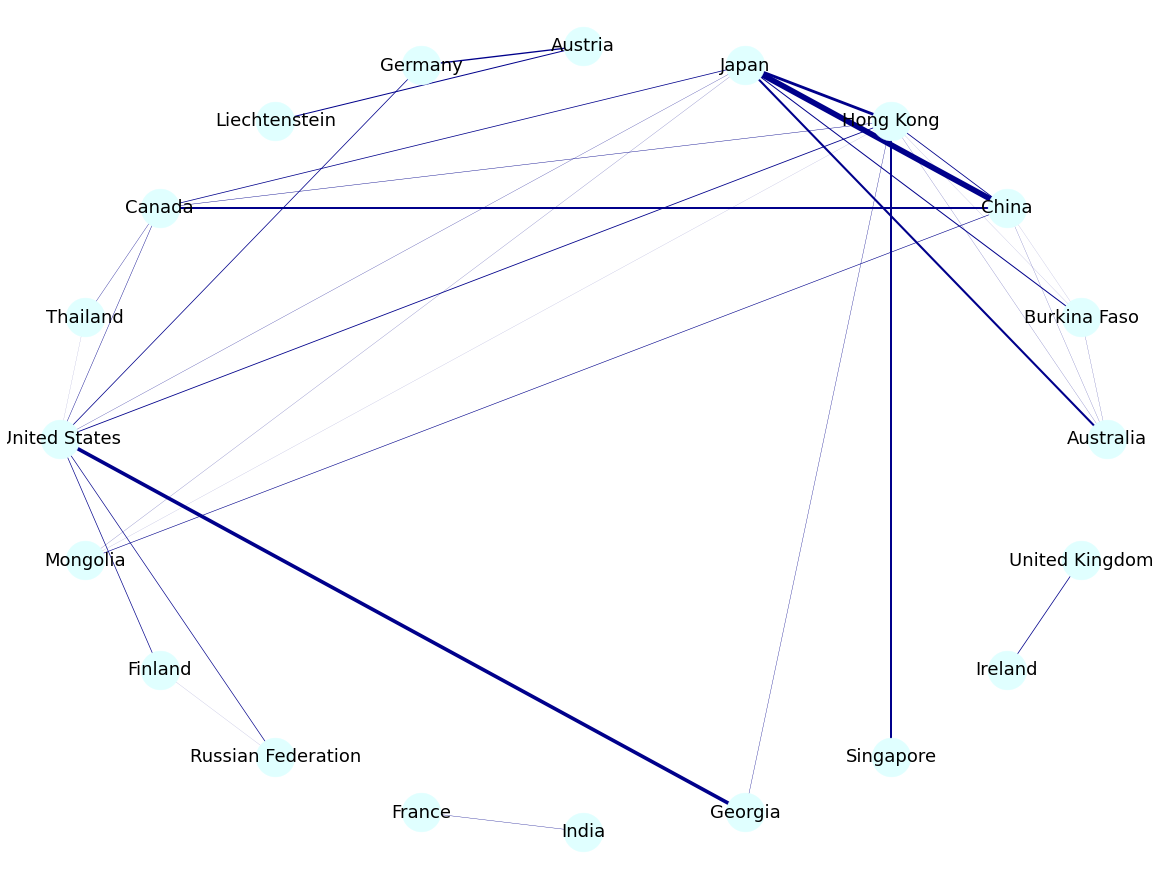

In [133]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (16,12)

G = nx.Graph()

for index, row in connections_df.iterrows():
    G.add_edge(row['Country 1'], row['Country 2'], weight = row['Weight'])

edges=G.edges()
weights = [G[u][v]['weight']/12 for u,v in edges]
# labels
nx.draw_circular(G,with_labels=True,font_size=18, font_family='sans-serif', node_size=1500,width=weights,node_color='lightcyan',edge_color='darkblue')
plt.axis('off')
plt.show()

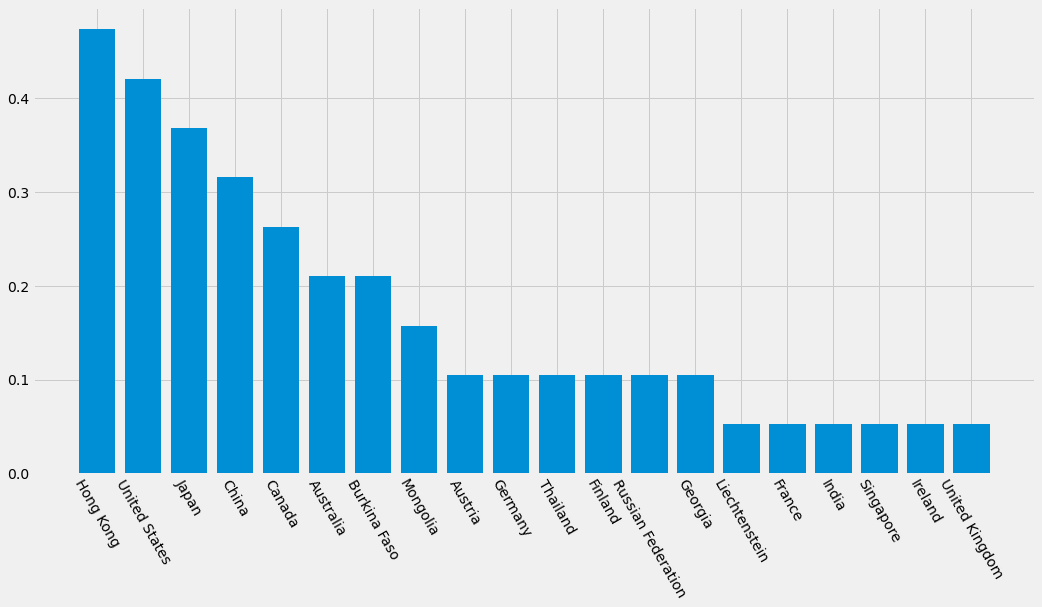

In [131]:
import seaborn as sns
degree_centrality = nx.degree_centrality(G)
degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(degree_centrality)), list(degree_centrality.values()), align='center')
plt.xticks(range(len(degree_centrality)), list(degree_centrality.keys()),rotation=-60)

plt.tight_layout
plt.show()

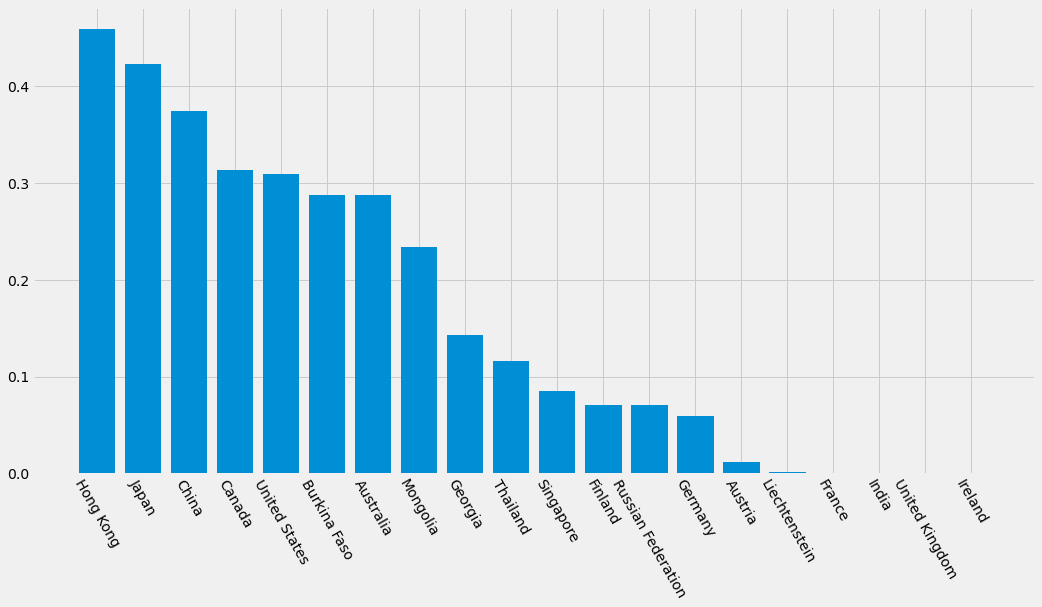

In [121]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
eigenvector_centrality = {k: v for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(eigenvector_centrality)), list(eigenvector_centrality.values()), align='center')
plt.xticks(range(len(eigenvector_centrality)), list(eigenvector_centrality.keys()),rotation=-60)

plt.tight_layout
plt.show()

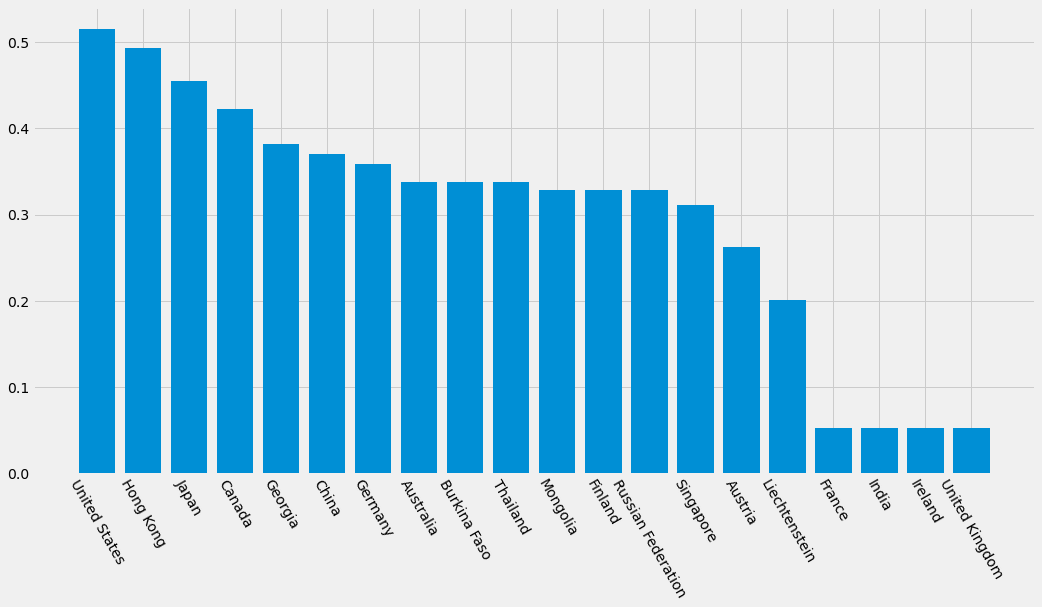

In [122]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(closeness_centrality)), list(closeness_centrality.values()), align='center')
plt.xticks(range(len(closeness_centrality)), list(closeness_centrality.keys()),rotation=-60)

plt.tight_layout
plt.show()

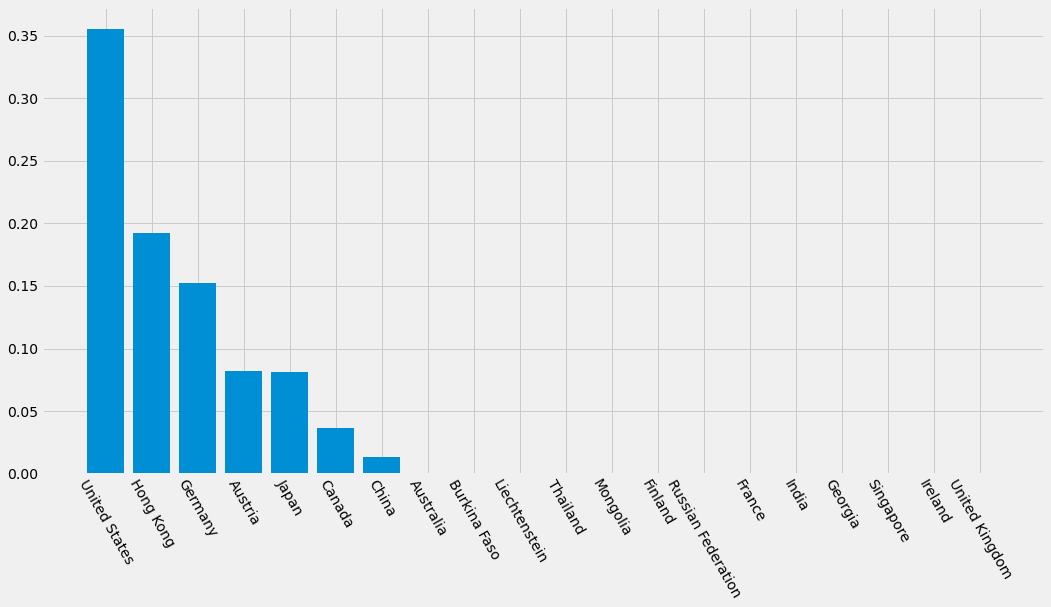

In [125]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()), align='center')
plt.xticks(range(len(betweenness_centrality)), list(betweenness_centrality.keys()),rotation=-60)

plt.tight_layout
plt.show()

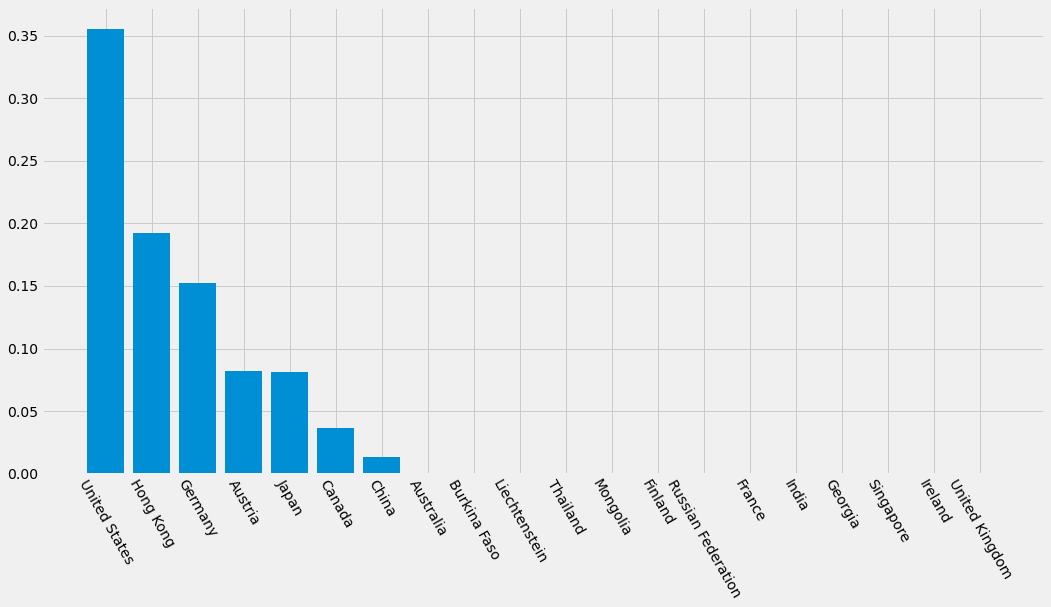

In [128]:

betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()), align='center')
plt.xticks(range(len(betweenness_centrality)), list(betweenness_centrality.keys()),rotation=-60)

plt.tight_layout
plt.show()

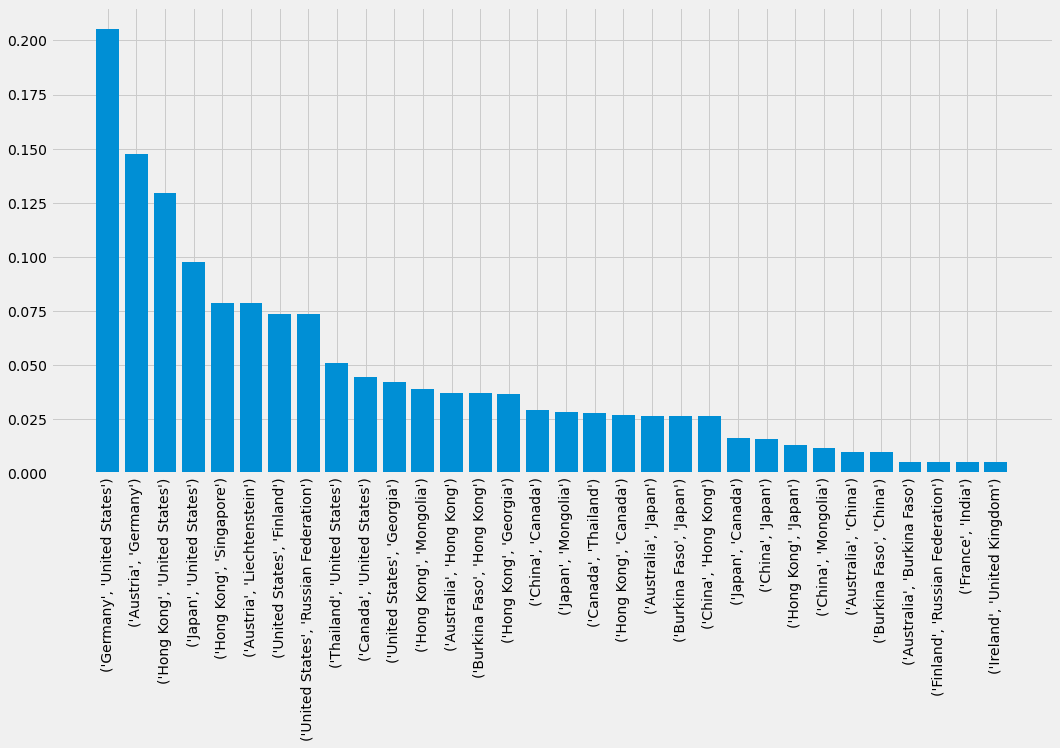

In [129]:
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
edge_betweenness_centrality = {k: v for k, v in sorted(edge_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(edge_betweenness_centrality)), list(edge_betweenness_centrality.values()), align='center')
plt.xticks(range(len(edge_betweenness_centrality)), list(edge_betweenness_centrality.keys()),rotation=90)

plt.tight_layout
plt.show()

In [119]:


edge_betweenness_centrality = nx.current_flow_betweenness_centrality(G)
edge_betweenness_centrality = {k: v for k, v in sorted(edge_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

plt.bar(range(len(edge_betweenness_centrality)), list(edge_betweenness_centrality.values()), align='center')
plt.xticks(range(len(edge_betweenness_centrality)), list(edge_betweenness_centrality.keys()),rotation=90)

plt.tight_layout
plt.show()

NetworkXError: Graph not connected.